In [1]:
import logging
from large_gcs.graph_generators.contact_graph_generator import (
    ContactGraphGeneratorParams,
    ContactGraphGenerator,
)
from large_gcs.algorithms.search_algorithm import ReexploreLevel, TieBreak
from large_gcs.graph.contact_graph import ContactGraph
from large_gcs.algorithms.gcs_astar import GcsAstar
from large_gcs.algorithms.gcs_astar_subopt import GcsAstarSubOpt
from large_gcs.algorithms.gcs_astar_convex_restriction import GcsAstarConvexRestriction
from large_gcs.algorithms.gcs_astar_tree import GcsAstarTree
from large_gcs.graph.contact_cost_constraint_factory import (
    contact_shortcut_edge_cost_factory_under,
    contact_shortcut_edge_cost_factory_over_obj_weighted,
)
from large_gcs.cost_estimators.shortcut_edge_ce import ShortcutEdgeCE
from large_gcs.cost_estimators.factored_collision_free_ce import FactoredCollisionFreeCE


import numpy as np
from copy import deepcopy
from IPython.display import HTML, display


np.set_printoptions(formatter={"float": lambda x: "{0:0.3f}".format(x)})
logging.basicConfig(level=logging.WARNING)
logging.getLogger("large_gcs").setLevel(logging.INFO)
logging.getLogger("drake").setLevel(logging.WARNING)

In [2]:
cg = ContactGraph.load_from_file(ContactGraphGeneratorParams.graph_file_path_from_name("cg_maze_a2"))

INFO:large_gcs.graph.contact_graph:Loading 35 contact pair modes for 4 bodies...


Set parameter Username
Academic license - for non-commercial use only - expires 2024-04-01


INFO:large_gcs.graph.contact_graph:Generating contact sets for 836 sets...
100%|██████████| 836/836 [00:01<00:00, 559.14it/s]
INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 838/838 [00:00<00:00, 11025.77it/s]
INFO:large_gcs.graph.graph:Adding 838 vertices to graph...
100%|██████████| 838/838 [00:00<00:00, 12675.18it/s]
INFO:large_gcs.graph.contact_graph:Creating edge costs...
100%|██████████| 53586/53586 [00:05<00:00, 9159.06it/s] 
INFO:large_gcs.graph.contact_graph:Creating edge constraints...
100%|██████████| 53586/53586 [00:09<00:00, 5433.98it/s]
INFO:large_gcs.graph.graph:Adding 53586 edges to graph...
100%|██████████| 53586/53586 [00:10<00:00, 5309.58it/s]
INFO:large_gcs.graph.contact_graph:Created contact graph: GraphParams(dim_bounds=(4, 18), n_vertices=838, n_edges=53586, source=[array([1.600, 0.600]), array([3.250, 0.000])], target=[array([-2.300, -0.700]), array([-0.500, 2.000])], workspace=array([[-5,  5],
       [-5,  5]]), default_costs_constr

In [ ]:
cg.plot()

In [ ]:
cost_estimator_se = ShortcutEdgeCE(cg, contact_shortcut_edge_cost_factory_over_obj_weighted)
gcs_astar_se = GcsAstarConvexRestriction(
    cg,
    cost_estimator=cost_estimator_se,
    reexplore_level=ReexploreLevel.NONE,
)
sol_se = gcs_astar_se.run()

In [ ]:
anim = cg.animate_solution()
HTML(anim.to_html5_video())

In [ ]:
gcs_astar = GcsAstarSubOpt(cg, use_convex_relaxation=False, shortcut_edge_cost_factory=contact_shortcut_edge_cost_factory_over_obj_weighted)
sol = gcs_astar.run(verbose=True)

In [ ]:
cost_estimator_se = ShortcutEdgeCE(cg, contact_shortcut_edge_cost_factory_over_obj_weighted)
gcs_astar_se = GcsAstarTree(
    cg,
    cost_estimator=cost_estimator_se,
    reexplore_level=ReexploreLevel.NONE,
    tiebreak=TieBreak.FIFO
)
sol_se = gcs_astar_se.run()

In [5]:
cost_estimator = FactoredCollisionFreeCE(cg, use_combined_gcs=False, obj_multiplier=100)
gcs_astar = GcsAstarConvexRestriction(
    cg,
    cost_estimator=cost_estimator,
    reexplore_level=ReexploreLevel.NONE,
)
sol = gcs_astar.run()

INFO:large_gcs.cost_estimators.factored_collision_free_ce:creating 2 collision free graphs...
0it [00:00, ?it/s]INFO:large_gcs.graph.factored_collision_free_graph:Creating vertex costs for factored_collision_free_graph...
100%|██████████| 25/25 [00:00<00:00, 7507.52it/s]
INFO:large_gcs.graph.graph:Adding 25 vertices to graph...
100%|██████████| 25/25 [00:00<00:00, 11255.65it/s]
INFO:large_gcs.graph.contact_graph:Generating edges...(parallel)
100%|██████████| 300/300 [00:00<00:00, 7177.64it/s]
INFO:large_gcs.graph.contact_graph:516 edges generated
INFO:large_gcs.graph.contact_graph:Creating edge costs...
100%|██████████| 516/516 [00:00<00:00, 23307.21it/s]
INFO:large_gcs.graph.contact_graph:Creating edge constraints...
100%|██████████| 516/516 [00:00<00:00, 11798.77it/s]
INFO:large_gcs.graph.graph:Adding 516 edges to graph...
100%|██████████| 516/516 [00:00<00:00, 10540.15it/s]
INFO:large_gcs.graph.factored_collision_free_graph:Created factored collision free graph for obj0: GraphParams

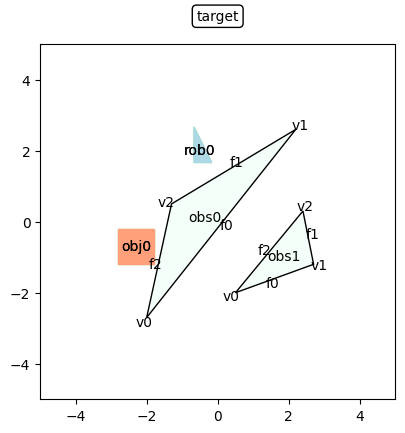

In [6]:
anim = cg.animate_solution()
HTML(anim.to_html5_video())

In [ ]:
cost_estimator = FactoredCollisionFreeCE(cg, use_combined_gcs=True, obj_multiplier=100)
gcs_astar = GcsAstarTree(
    cg,
    cost_estimator=cost_estimator,
    reexplore_level=ReexploreLevel.NONE,
)
sol = gcs_astar.run()


In [3]:
cost_estimator = FactoredCollisionFreeCE(cg, use_combined_gcs=True, obj_multiplier=100)
gcs_astar = GcsAstarConvexRestriction(
    cg,
    cost_estimator=cost_estimator,
    reexplore_level=ReexploreLevel.NONE,
)
sol = gcs_astar.run(animate_intermediate=False)

INFO:large_gcs.cost_estimators.factored_collision_free_ce:creating 2 collision free graphs...
0it [00:00, ?it/s]INFO:large_gcs.graph.factored_collision_free_graph:Creating vertex costs for factored_collision_free_graph...
100%|██████████| 25/25 [00:00<00:00, 7444.63it/s]
INFO:large_gcs.graph.graph:Adding 25 vertices to graph...
100%|██████████| 25/25 [00:00<00:00, 16259.51it/s]
INFO:large_gcs.graph.contact_graph:Generating edges...(parallel)
100%|██████████| 300/300 [00:00<00:00, 6024.28it/s]
INFO:large_gcs.graph.contact_graph:516 edges generated
INFO:large_gcs.graph.contact_graph:Creating edge costs...
100%|██████████| 516/516 [00:00<00:00, 15786.46it/s]
INFO:large_gcs.graph.contact_graph:Creating edge constraints...
100%|██████████| 516/516 [00:00<00:00, 11576.68it/s]
INFO:large_gcs.graph.graph:Adding 516 edges to graph...
100%|██████████| 516/516 [00:00<00:00, 9150.13it/s]
INFO:large_gcs.graph.factored_collision_free_graph:Created factored collision free graph for obj0: GraphParams(

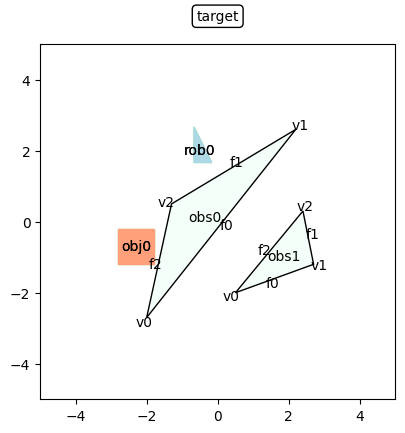

In [4]:
anim = cg.animate_solution()
HTML(anim.to_html5_video())

## Path refinement?

In [ ]:
vertex_inclusion = ['source',
 "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f1-rob0_v2', 'NC|obj0_f1-rob0_f1')",
 "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'NC|obj0_f1-rob0_f1')",
 "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_f1-rob0_f1')",
 "('IC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_f1-rob0_f1')",
 "('IC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_f1-rob0_f1')",
 "('IC|obs0_v0-obj0_f1', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')",
 "('IC|obs0_v0-obj0_f1', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f0-rob0_v1', 'IC|obj0_f0-rob0_v1')",
 "('IC|obs0_v0-obj0_f1', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_f0-rob0_v1')",
 "('NC|obs0_f2-obj0_v1', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'NC|obj0_f0-rob0_v1')",
 "('NC|obs0_f2-obj0_v1', 'NC|obs0_f2-rob0_v0', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'NC|obj0_f0-rob0_v1')",
 "('NC|obs0_f2-obj0_v1', 'NC|obs0_f2-rob0_v0', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_f0-rob0_v1')",
 "('NC|obs0_f2-obj0_v1', 'NC|obs0_f2-rob0_v0', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_f1-rob0_f1')",
 "('NC|obs0_f2-obj0_v1', 'NC|obs0_f1-rob0_v0', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_f2-rob0_f2')",
 "('NC|obs0_f2-obj0_v1', 'NC|obs0_f1-rob0_v0', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_f3-rob0_v0')",
 "('NC|obs0_f2-obj0_v1', 'NC|obs0_f1-rob0_v0', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'NC|obj0_f2-rob0_f2')",
 'target']
# Partial revisits
# vertex_inclusion = ["source","('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f1-rob0_v2', 'NC|obj0_f1-rob0_f1')","('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'NC|obj0_f2-rob0_f2')","('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_f1-rob0_f1')","('IC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_f2-rob0_f2')","('IC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_f1-rob0_f1')","('IC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_f1-rob0_f1')","('IC|obs0_v0-obj0_f1', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')","('IC|obs0_v0-obj0_f1', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f0-rob0_v1', 'IC|obj0_f0-rob0_v1')","('IC|obs0_v0-obj0_f1', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'NC|obj0_f1-rob0_f1')","('IC|obs0_v0-obj0_f1', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_f0-rob0_v1')","('IC|obs0_f2-obj0_v1', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'NC|obj0_f0-rob0_v1')","('IC|obs0_v0-obj0_f1', 'NC|obs0_f2-rob0_v0', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'NC|obj0_f0-rob0_v1')","('IC|obs0_f2-obj0_v1', 'NC|obs0_f2-rob0_v0', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_v0-rob0_f0')","('NC|obs0_f2-obj0_v1', 'NC|obs0_f1-rob0_v0', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_f3-rob0_v0')","('NC|obs0_f2-obj0_v1', 'NC|obs0_f1-rob0_v0', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_f2-rob0_f2')","('NC|obs0_f2-obj0_v1', 'NC|obs0_f1-rob0_v0', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_f1-rob0_f1')","('NC|obs0_f2-obj0_v1', 'NC|obs0_f2-rob0_v0', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_f2-rob0_f2')","('NC|obs0_f2-obj0_v1', 'NC|obs0_f1-rob0_v0', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'NC|obj0_f2-rob0_f2')","target"]
cg = ContactGraph.load_from_file(ContactGraphGeneratorParams.graph_file_path_from_name("cg_maze_a2"),
                                 vertex_inclusion=vertex_inclusion)

In [ ]:
sol = cg.solve_shortest_path()

In [ ]:
anim = cg.animate_solution()
HTML(anim.to_html5_video())

In [ ]:
print(sol.cost)
print(len(sol.vertex_path))

# Initial testing and development

In [ ]:
fcfg = cost_estimator._cfree_graphs[0]
fcfg.plot()
fcfg.vertex_names


In [ ]:
cg.vertex_names[:5]

In [ ]:
import re
def find_obj_rob_numbers(s):
    match = re.search(r'(obj|rob)(\d+)', s)
    if match:
        return match.group(2)  # group 2 is the second capture group, which contains the digits
    else:
        return None

print(find_obj_rob_numbers("'(IC|obs0_f0-obj92_v3',)"))  # prints 92
print(find_obj_rob_numbers("'(NC|obs0_f0-rob111_v1',)"))  # prints 111

In [ ]:
import ast

test_vertex_names = [
    "('IC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f1-obj0_v0', 'NC|obs1_f0-rob0_v1', 'NC|obj0_f0-rob0_v1', 'IC|obs0_f0-obj5_v3', 'NC|obs0_f0-rob5_v1',)",
    "('IC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f1-obj0_v0', 'NC|obs1_f0-rob0_v1', 'NC|obj0_f1-rob0_f1', 'NC|obj2_f8-rob2_f1', 'NC|obs3_f1-obj5_v0',)"
 ]
    
def split_vertex_names(vertex_names):
    res = []
    for vertex in vertex_names:
        # Convert string representation of tuple to actual tuple
        tuple_vertex = ast.literal_eval(vertex)
        
        # Initialize dictionaries to store modes for each obj and rob
        obj_modes = {}
        rob_modes = {}
        
        for mode in tuple_vertex:
            # Check if mode contains both obj and rob
            if 'obj' in mode and 'rob' in mode:
                continue
            
            # Extract the entity number from the mode string
            entity_num = find_obj_rob_numbers(mode)
            # Add mode to appropriate dictionary
            if 'obj' in mode:
                if entity_num not in obj_modes:
                    obj_modes[entity_num] = []
                obj_modes[entity_num].append(mode)
            elif 'rob' in mode:
                if entity_num not in rob_modes:
                    rob_modes[entity_num] = []
                rob_modes[entity_num].append(mode)
        
        # Combine mode dictionaries into a list of tuples and add to result
        vertex_res = []
        for entity_num, modes in obj_modes.items():
            vertex_res.append(str(tuple(modes)))
        for entity_num, modes in rob_modes.items():
            vertex_res.append(str(tuple(modes)))
        res.append(vertex_res)
    return res

def split_vertex_name(vertex):
    # Convert string representation of tuple to actual tuple
    tuple_vertex = ast.literal_eval(vertex)
    
    # Initialize dictionaries to store modes for each obj and rob
    obj_modes = {}
    rob_modes = {}
    
    for mode in tuple_vertex:
        # Check if mode contains both obj and rob
        if 'obj' in mode and 'rob' in mode:
            continue
        
        # Extract the entity number from the mode string
        entity_num = find_obj_rob_numbers(mode)
        # Add mode to appropriate dictionary
        if 'obj' in mode:
            if entity_num not in obj_modes:
                obj_modes[entity_num] = []
            obj_modes[entity_num].append(mode)
        elif 'rob' in mode:
            if entity_num not in rob_modes:
                rob_modes[entity_num] = []
            rob_modes[entity_num].append(mode)
    
    # Combine mode dictionaries into a list of tuples and add to result
    vertex_res = []
    for entity_num, modes in obj_modes.items():
        vertex_res.append(str(tuple(modes)))
    for entity_num, modes in rob_modes.items():
        vertex_res.append(str(tuple(modes)))
    return vertex_res

# split_vertex_names(cg.vertex_names[:1])
split_vertex_names(test_vertex_names)

In [ ]:
for cfree_vs in split_vertex_names(cg.vertex_names[:100]):
    for i, cfree_v in enumerate(cfree_vs):
        res = cfree_v in cost_estimator._cfree_graphs[i].vertex_names
        if not res:
            print(f"body{i}: {cfree_v} not in cfree_graph!")
        # print(f"body{i}: {cfree_v} in cfree_graph: {res}")

In [ ]:
# fcfg.set_source(fcfg.vertex_names[1])
# sol = fcfg.solve()
# anim = fcfg.animate_solution()
# HTML(anim.to_html5_video())

In [ ]:
# for g in cost_estimator._collision_free_graphs:
#     for v in g.vertex_names:
#         if v == "target":
#             continue
#         g.set_source(v)
#         sol = g.solve()
#         print(f"Reaching target from {v} succeeded: {sol.is_success}")
#         anim = g.animate_solution()
#         display(HTML(anim.to_html5_video()))

## Validating Combined Factored GCS

In [ ]:
from large_gcs.graph.graph import Graph, ShortestPathSolution

In [ ]:
cg = ContactGraph.load_from_file(ContactGraphGeneratorParams.graph_file_path_from_name("cg_trichal2"))

In [ ]:
# v_path = ['source',
#  "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0')",
#  "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_v0-rob0_f0')",
#  "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f0-rob0_v1')",
#  "('NC|obs0_f1-obj0_f0', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')",
#  "('IC|obs0_f1-obj0_f0', 'NC|obs0_f1-rob0_f2', 'IC|obj0_f1-rob0_f1')",
#  "('NC|obs0_f2-obj0_f1', 'NC|obs0_f1-rob0_f2', 'IC|obj0_f2-rob0_f2')",
#  "('NC|obs0_f2-obj0_f1', 'NC|obs0_f2-rob0_v0', 'IC|obj0_f2-rob0_f2')",
#  "('NC|obs0_f2-obj0_f1', 'NC|obs0_f2-rob0_v0', 'NC|obj0_f3-rob0_v0')",
#  'target']
# active_edges = [cg.edges[v_path[i], v_path[i+1]] for i in range(3)]
# cost_estimator = FactoredCollisionFreeCE(cg, use_combined_gcs=True, obj_multiplier=100)
# subgraph = Graph()
# cost_estimator.estimate_cost(cg, cg.edges[v_path[0], v_path[1]], active_edges=active_edges, use_convex_relaxation=True)
